In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings('ignore')

In [10]:
company = pd.read_csv("companies.csv")

In [11]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [12]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [13]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information.
    2. Remove noise or unreliable data (missing values and outliers).
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [14]:
company = company.drop(['region', 'city', 'state_code'], axis=1)

#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [15]:
company = company.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1)

#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [16]:
company = company.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',
                        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',
                        'invested_companies'], axis=1)

#### 1.d. Delete duplicate values if found any.

In [17]:
# Delete duplicate values if found any.
company.duplicated().sum()

np.int64(87089)

In [18]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.
print(f"Number of duplicate rows: {company.duplicated().sum()}")

Number of duplicate rows: 87089


In [19]:
# Let's delete all the duplicate values
company.drop_duplicates(inplace=True)

In [20]:
# check if any left
print(f"Number of duplicate rows after dropping: {company.duplicated().sum()}")

Number of duplicate rows after dropping: 0


#### 1.e. Delete those which has more than 98% of null values.

In [21]:
# Calculate the percentage of null values for each column
null_percentages = company.isnull().sum() / len(company) * 100

# Identify columns with more than 98% null values
columns_to_drop = null_percentages[null_percentages > 98].index

# Drop the identified columns
company = company.drop(columns=columns_to_drop)

company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [22]:
# Drop rows with missing values in specified columns
company.dropna(subset=['status', 'country_code', 'category_code', 'founded_at'], inplace=True)

In [23]:
# Check the number of remaining rows
print(f"Number of rows after dropping NaNs: {len(company)}")

Number of rows after dropping NaNs: 63585


In [24]:
# Check for remaining null values in the specified columns
print("Null values after dropping:")
print(company[['status', 'country_code', 'category_code', 'founded_at']].isnull().sum())

Null values after dropping:
status           0
country_code     0
category_code    0
founded_at       0
dtype: int64


In [25]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,NaN,NaN,NaN,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

In [26]:
company = company[
    (company['funding_total_usd'] >= company['funding_total_usd'].quantile(0.25)) &
    (company['funding_total_usd'] <= company['funding_total_usd'].quantile(0.75))
]
company = company[
    (company['funding_rounds'] >= company['funding_rounds'].quantile(0.25)) &
    (company['funding_rounds'] <= company['funding_rounds'].quantile(0.75))
]

## Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds':

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimmin

#### 2.b.1. Find the IQR

In [27]:
# For funding_total_usd
Q1_fund_total = company['funding_total_usd'].quantile(0.25)
Q3_fund_total = company['funding_total_usd'].quantile(0.75)
IQR_fund_total = Q3_fund_total - Q1_fund_total

# For funding_rounds
Q1_fund_rounds = company['funding_rounds'].quantile(0.25)
Q3_fund_rounds = company['funding_rounds'].quantile(0.75)
IQR_fund_rounds = Q3_fund_rounds - Q1_fund_rounds

#### 2.b.1. Find the Upper and Lower limit

In [28]:
# For funding_total_usd
upper_limit_fund_total = Q3_fund_total + 1.5 * IQR_fund_total
lower_limit_fund_total = Q1_fund_total - 1.5 * IQR_fund_total

# For funding_rounds
upper_limit_fund_rounds = Q3_fund_rounds + 1.5 * IQR_fund_rounds
lower_limit_fund_rounds = Q1_fund_rounds - 1.5 * IQR_fund_rounds

#### 2.b.1.  Find outliers

In [29]:
# For funding_total_usd
outliers_fund_total = company[(company['funding_total_usd'] > upper_limit_fund_total) | (company['funding_total_usd'] < lower_limit_fund_total)]
print(f"Number of outliers in funding_total_usd: {len(outliers_fund_total)}")

# For funding_rounds
outliers_fund_rounds = company[(company['funding_rounds'] > upper_limit_fund_rounds) | (company['funding_rounds'] < lower_limit_fund_rounds)]
print(f"Number of outliers in funding_rounds: {len(outliers_fund_rounds)}")

Number of outliers in funding_total_usd: 136
Number of outliers in funding_rounds: 0


#### 2.b.1. Drop the outliers

In [30]:
# For funding_total_usd
company = company[(company['funding_total_usd'] <= upper_limit_fund_total) & (company['funding_total_usd'] >= lower_limit_fund_total)]

# For funding_rounds
company = company[(company['funding_rounds'] <= upper_limit_fund_rounds) & (company['funding_rounds'] >= lower_limit_fund_rounds)]

In [31]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007-10-01,NaN,USA,NaN,NaN,NaN,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
36,medical,operating,2006-01-01,NaN,USA,NaN,NaN,NaN,2011-09-06,2012-07-10,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822
45,enterprise,operating,2004-01-01,NaN,USA,NaN,NaN,NaN,2011-09-06,2011-09-06,1.0,1500000.0,2010-01-01,2010-01-01,1.0,8.0,47.610150,-122.201516
48,web,operating,2006-01-01,NaN,USA,NaN,NaN,NaN,2007-10-01,2007-10-01,1.0,2500000.0,2010-07-01,2012-05-01,2.0,7.0,37.774929,-122.419415
77,software,operating,1996-01-01,NaN,USA,NaN,NaN,NaN,2011-03-01,2012-04-10,2.0,840000.0,NaN,NaN,NaN,19.0,42.269522,-71.616129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196497,web,operating,2006-11-01,NaN,IND,NaN,NaN,NaN,2007-09-01,2007-09-01,1.0,10000000.0,2006-10-01,2006-10-01,1.0,4.0,31.326015,75.576183
196517,enterprise,operating,2011-01-01,NaN,USA,NaN,NaN,NaN,2011-09-08,2011-09-08,1.0,750000.0,2011-06-01,2011-06-01,1.0,3.0,47.751074,-120.740139
196525,web,operating,2007-09-15,NaN,BRB,NaN,NaN,NaN,2008-02-10,2008-02-10,1.0,798679.0,2008-01-15,2008-11-12,3.0,2.0,13.113222,-59.598809
196540,games_video,closed,2006-06-01,2012-07-03,USA,NaN,NaN,NaN,2008-03-12,2009-02-01,2.0,1100000.0,2005-11-01,2008-09-10,2.0,4.0,37.774929,-122.419415


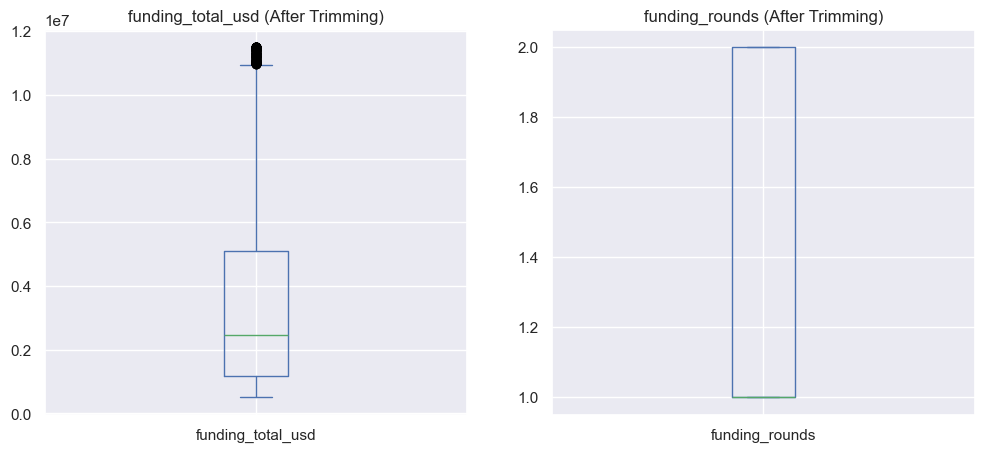

In [32]:
# ===== Step 5: Compare Plots After Trimming =====
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
company['funding_total_usd'].plot(kind='box', title='funding_total_usd (After Trimming)')

plt.subplot(1,2,2)
company['funding_rounds'].plot(kind='box', title='funding_rounds (After Trimming)')

plt.show()

## 2.c. Delete contradictory (mutually opposed or inconsistent data).

In [33]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007-10-01,NaN,USA,NaN,NaN,NaN,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
36,medical,operating,2006-01-01,NaN,USA,NaN,NaN,NaN,2011-09-06,2012-07-10,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822
45,enterprise,operating,2004-01-01,NaN,USA,NaN,NaN,NaN,2011-09-06,2011-09-06,1.0,1500000.0,2010-01-01,2010-01-01,1.0,8.0,47.610150,-122.201516
48,web,operating,2006-01-01,NaN,USA,NaN,NaN,NaN,2007-10-01,2007-10-01,1.0,2500000.0,2010-07-01,2012-05-01,2.0,7.0,37.774929,-122.419415
77,software,operating,1996-01-01,NaN,USA,NaN,NaN,NaN,2011-03-01,2012-04-10,2.0,840000.0,NaN,NaN,NaN,19.0,42.269522,-71.616129


# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [34]:
# For founded_at
company['founded_at'] = pd.to_datetime(company['founded_at'], errors='coerce').dt.year

# closed_at
company['closed_at'] = pd.to_datetime(company['closed_at'], errors='coerce').dt.year

# # first_funding_at
company['first_funding_at'] = pd.to_datetime(company['first_funding_at'], errors='coerce').dt.year

# # last_funding_at
company['last_funding_at'] = pd.to_datetime(company['last_funding_at'], errors='coerce').dt.year

# # first_milestone_at
company['first_milestone_at'] = pd.to_datetime(company['first_milestone_at'], errors='coerce').dt.year

# # last_milestone_at
company['last_milestone_at'] = pd.to_datetime(company['last_milestone_at'], errors='coerce').dt.year

company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007,NaN,USA,NaN,NaN,NaN,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,37.386052,-122.083851
36,medical,operating,2006,NaN,USA,NaN,NaN,NaN,2011.0,2012.0,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822
45,enterprise,operating,2004,NaN,USA,NaN,NaN,NaN,2011.0,2011.0,1.0,1500000.0,2010.0,2010.0,1.0,8.0,47.610150,-122.201516
48,web,operating,2006,NaN,USA,NaN,NaN,NaN,2007.0,2007.0,1.0,2500000.0,2010.0,2012.0,2.0,7.0,37.774929,-122.419415
77,software,operating,1996,NaN,USA,NaN,NaN,NaN,2011.0,2012.0,2.0,840000.0,NaN,NaN,NaN,19.0,42.269522,-71.616129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196497,web,operating,2006,NaN,IND,NaN,NaN,NaN,2007.0,2007.0,1.0,10000000.0,2006.0,2006.0,1.0,4.0,31.326015,75.576183
196517,enterprise,operating,2011,NaN,USA,NaN,NaN,NaN,2011.0,2011.0,1.0,750000.0,2011.0,2011.0,1.0,3.0,47.751074,-120.740139
196525,web,operating,2007,NaN,BRB,NaN,NaN,NaN,2008.0,2008.0,1.0,798679.0,2008.0,2008.0,3.0,2.0,13.113222,-59.598809
196540,games_video,closed,2006,2012.0,USA,NaN,NaN,NaN,2008.0,2009.0,2.0,1100000.0,2005.0,2008.0,2.0,4.0,37.774929,-122.419415


#### 1.b. Generalize the categorical data i.e. category_code and  country_code

In [35]:
# 1. category_code
category_counts = company['category_code'].value_counts()
print(category_counts)

category_code
software            1617
biotech              806
web                  786
mobile               612
enterprise           484
ecommerce            436
games_video          380
advertising          356
hardware             304
analytics            224
cleantech            200
health               184
other                157
finance              149
social               147
medical              141
network_hosting      139
security             137
education            132
public_relations     117
semiconductor        112
consulting            92
search                87
manufacturing         83
hospitality           79
fashion               70
travel                64
messaging             64
news                  56
music                 51
real_estate           39
photo_video           39
sports                34
nonprofit             29
transportation        22
automotive            20
nanotech              19
legal                 17
design                13
local      

In [36]:
# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name
# remaining one as other.

country_counts = company['country_code'].value_counts()
top_10_countries = country_counts.head(10).index.tolist()
print(top_10_countries)

['USA', 'GBR', 'CAN', 'FRA', 'ISR', 'DEU', 'IND', 'ESP', 'IRL', 'SWE']


In [37]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.
company['country_code'] = company['country_code'].apply(lambda x: x if x in top_10_countries else 'other')

In [38]:
print(company['country_code'].value_counts())

country_code
USA      5823
other     834
GBR       519
CAN       297
FRA       272
ISR       204
DEU       151
IND       120
ESP       119
IRL        92
SWE        84
Name: count, dtype: int64


In [39]:
# Let's check if we've more than 15 columns
print(len(company['country_code'].unique()))

11


In [40]:
# One-hot encoding to category_code
country_encoded = pd.get_dummies(company['country_code'], prefix='country')

In [41]:
# Concatenate category with company dataset
company = pd.concat([company, country_encoded], axis=1)

In [42]:
# Since, We've added the encoded country_code , let's delete original category_code
company = company.drop('country_code', axis=1)

### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [43]:
# Create new feature isClosed from closed_at and status.
# if the value in status is 'operating' or 'ipo', Let's put 1.
# Where as if the value is 'acquired' or 'closed', let's put 0.
company['isClosed'] = company['status'].apply(lambda x: 1 if x in ['operating', 'ipo'] else 0)

In [44]:
# Let's check the value counts of the new column
print(company['isClosed'].value_counts())

isClosed
1    7326
0    1189
Name: count, dtype: int64


In [45]:
company.head()

,category_code,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,...,country_ESP,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed
13,web,acquired,2007,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,...,False,False,False,False,False,False,False,True,False,0
36,medical,operating,2006,NaN,NaN,NaN,NaN,2011.0,2012.0,2.0,...,False,False,False,False,False,False,False,True,False,1
45,enterprise,operating,2004,NaN,NaN,NaN,NaN,2011.0,2011.0,1.0,...,False,False,False,False,False,False,False,True,False,1
48,web,operating,2006,NaN,NaN,NaN,NaN,2007.0,2007.0,1.0,...,False,False,False,False,False,False,False,True,False,1
77,software,operating,1996,NaN,NaN,NaN,NaN,2011.0,2012.0,2.0,...,False,False,False,False,False,False,False,True,False,1


#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days,
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

In [46]:
## 2.b.Create new feature 'active_days'
company['founded_at'] = pd.to_datetime(company['founded_at'], errors='coerce')
company['closed_at'] = pd.to_datetime(company['closed_at'], errors='coerce')

company['active_days'] = (company['closed_at'] - company['founded_at']).dt.days
print(company['active_days'])

13        NaN
36        NaN
45        NaN
48        NaN
77        NaN
         ... 
196497    NaN
196517    NaN
196525    NaN
196540    0.0
196549    NaN
Name: active_days, Length: 8515, dtype: float64


##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [47]:
# Replacing the values in closed_at column based on status
company['closed_at'] = company.apply(lambda row: 2021 if row['status'] in ['operating', 'ipo'] else (0 if row['status'] in ['acquired', 'closed'] else row['closed_at']), axis=1)

In [48]:
# Let's check the value counts for closed_at
print(company['closed_at'].value_counts())

closed_at
2021    7326
0       1189
Name: count, dtype: int64


In [49]:
company.head()

,category_code,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,...,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days
13,web,acquired,1970-01-01 00:00:00.000002007,0,NaN,NaN,NaN,2008.0,2008.0,1.0,...,False,False,False,False,False,False,True,False,0,NaN
36,medical,operating,1970-01-01 00:00:00.000002006,2021,NaN,NaN,NaN,2011.0,2012.0,2.0,...,False,False,False,False,False,False,True,False,1,NaN
45,enterprise,operating,1970-01-01 00:00:00.000002004,2021,NaN,NaN,NaN,2011.0,2011.0,1.0,...,False,False,False,False,False,False,True,False,1,NaN
48,web,operating,1970-01-01 00:00:00.000002006,2021,NaN,NaN,NaN,2007.0,2007.0,1.0,...,False,False,False,False,False,False,True,False,1,NaN
77,software,operating,1970-01-01 00:00:00.000001996,2021,NaN,NaN,NaN,2011.0,2012.0,2.0,...,False,False,False,False,False,False,True,False,1,NaN


##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [50]:
# Calculate active_days
# Ensure both columns are numeric before subtraction
company['founded_at'] = pd.to_numeric(company['founded_at'], errors='coerce')
company['closed_at'] = pd.to_numeric(company['closed_at'], errors='coerce')

company['active_days'] = (company['closed_at'] - company['founded_at']) * 365

# Check for contradictory data where active_days is negative
contradictory_data = company[company['active_days'] < 0]
print(f"Number of contradictory data points (negative active_days): {len(contradictory_data)}")

# Drop contradictory data
company = company[company['active_days'] >= 0]

Number of contradictory data points (negative active_days): 1189


#### 2.b.iii. Then, delete the closed_at column.

In [51]:
# Delete the closed_at column
company = company.drop('closed_at', axis=1)

### Let's work on target variabe now.

In [52]:
# Create a new binary target variable based on the 'status' column
company['Operating_Status'] = company['status'].apply(lambda x: 'Operating' if x in ['operating', 'ipo'] else 'Not Operating')

# Display the value counts of the new target variable
print(company['Operating_Status'].value_counts())

# Display the first few rows to show the new column
display(company.head())

Operating_Status
Operating    7326
Name: count, dtype: int64


,category_code,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
36,medical,operating,2006,NaN,NaN,NaN,2011.0,2012.0,2.0,11300000.0,...,False,False,False,False,False,True,False,1,5475,Operating
45,enterprise,operating,2004,NaN,NaN,NaN,2011.0,2011.0,1.0,1500000.0,...,False,False,False,False,False,True,False,1,6205,Operating
48,web,operating,2006,NaN,NaN,NaN,2007.0,2007.0,1.0,2500000.0,...,False,False,False,False,False,True,False,1,5475,Operating
77,software,operating,1996,NaN,NaN,NaN,2011.0,2012.0,2.0,840000.0,...,False,False,False,False,False,True,False,1,9125,Operating
94,education,operating,2009,NaN,NaN,NaN,2011.0,2011.0,1.0,559522.0,...,True,False,False,False,False,False,False,1,4380,Operating


### Remove the null values with the mean value in 'Numerical Data'

In [53]:
# Numeric columns  missing values fill 
numeric_cols = company.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    mean_val = company[col].mean()
    company[col].fillna(mean_val, inplace=True)

print(company[numeric_cols].isnull().sum())

founded_at            0
investment_rounds     0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
isClosed              0
active_days           0
dtype: int64


In [54]:
company

,category_code,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
36,medical,operating,2006,NaN,NaN,15.679245,2011.0,2012.0,2.0,11300000.0,...,False,False,False,False,False,True,False,1,5475,Operating
45,enterprise,operating,2004,NaN,NaN,15.679245,2011.0,2011.0,1.0,1500000.0,...,False,False,False,False,False,True,False,1,6205,Operating
48,web,operating,2006,NaN,NaN,15.679245,2007.0,2007.0,1.0,2500000.0,...,False,False,False,False,False,True,False,1,5475,Operating
77,software,operating,1996,NaN,NaN,15.679245,2011.0,2012.0,2.0,840000.0,...,False,False,False,False,False,True,False,1,9125,Operating
94,education,operating,2009,NaN,NaN,15.679245,2011.0,2011.0,1.0,559522.0,...,True,False,False,False,False,False,False,1,4380,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196485,web,operating,2008,NaN,NaN,15.679245,2008.0,2008.0,2.0,600000.0,...,False,False,False,False,False,True,False,1,4745,Operating
196497,web,operating,2006,NaN,NaN,15.679245,2007.0,2007.0,1.0,10000000.0,...,False,True,False,False,False,False,False,1,5475,Operating
196517,enterprise,operating,2011,NaN,NaN,15.679245,2011.0,2011.0,1.0,750000.0,...,False,False,False,False,False,True,False,1,3650,Operating
196525,web,operating,2007,NaN,NaN,15.679245,2008.0,2008.0,1.0,798679.0,...,False,False,False,False,False,False,True,1,5110,Operating


In [55]:
# Identify numerical columns (excluding the target and potentially other non-imputable columns)
numerical_cols = company.select_dtypes(include=np.number).columns.tolist()
# Exclude 'isClosed' and 'active_days' as they were recently created and should not have NaNs from original data
numerical_cols.remove('isClosed')
numerical_cols.remove('active_days')


# Impute missing values in numerical columns with the mean
for col in numerical_cols:
    if company[col].isnull().any():
        mean_val = company[col].mean()
        company[col].fillna(mean_val, inplace=True)

In [56]:
company

,category_code,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
36,medical,operating,2006,NaN,NaN,15.679245,2011.0,2012.0,2.0,11300000.0,...,False,False,False,False,False,True,False,1,5475,Operating
45,enterprise,operating,2004,NaN,NaN,15.679245,2011.0,2011.0,1.0,1500000.0,...,False,False,False,False,False,True,False,1,6205,Operating
48,web,operating,2006,NaN,NaN,15.679245,2007.0,2007.0,1.0,2500000.0,...,False,False,False,False,False,True,False,1,5475,Operating
77,software,operating,1996,NaN,NaN,15.679245,2011.0,2012.0,2.0,840000.0,...,False,False,False,False,False,True,False,1,9125,Operating
94,education,operating,2009,NaN,NaN,15.679245,2011.0,2011.0,1.0,559522.0,...,True,False,False,False,False,False,False,1,4380,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196485,web,operating,2008,NaN,NaN,15.679245,2008.0,2008.0,2.0,600000.0,...,False,False,False,False,False,True,False,1,4745,Operating
196497,web,operating,2006,NaN,NaN,15.679245,2007.0,2007.0,1.0,10000000.0,...,False,True,False,False,False,False,False,1,5475,Operating
196517,enterprise,operating,2011,NaN,NaN,15.679245,2011.0,2011.0,1.0,750000.0,...,False,False,False,False,False,True,False,1,3650,Operating
196525,web,operating,2007,NaN,NaN,15.679245,2008.0,2008.0,1.0,798679.0,...,False,False,False,False,False,False,True,1,5110,Operating


In [57]:
# Final null check on data
print("Null values after imputation:")
print(company.isnull().sum())

Null values after imputation:
category_code             0
status                    0
founded_at                0
first_investment_at    7273
last_investment_at     7273
investment_rounds         0
first_funding_at          0
last_funding_at           0
funding_rounds            0
funding_total_usd         0
first_milestone_at        0
last_milestone_at         0
milestones                0
relationships             0
lat                       0
lng                       0
country_CAN               0
country_DEU               0
country_ESP               0
country_FRA               0
country_GBR               0
country_IND               0
country_IRL               0
country_ISR               0
country_SWE               0
country_USA               0
country_other             0
isClosed                  0
active_days               0
Operating_Status          0
dtype: int64


In [58]:
company

,category_code,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
36,medical,operating,2006,NaN,NaN,15.679245,2011.0,2012.0,2.0,11300000.0,...,False,False,False,False,False,True,False,1,5475,Operating
45,enterprise,operating,2004,NaN,NaN,15.679245,2011.0,2011.0,1.0,1500000.0,...,False,False,False,False,False,True,False,1,6205,Operating
48,web,operating,2006,NaN,NaN,15.679245,2007.0,2007.0,1.0,2500000.0,...,False,False,False,False,False,True,False,1,5475,Operating
77,software,operating,1996,NaN,NaN,15.679245,2011.0,2012.0,2.0,840000.0,...,False,False,False,False,False,True,False,1,9125,Operating
94,education,operating,2009,NaN,NaN,15.679245,2011.0,2011.0,1.0,559522.0,...,True,False,False,False,False,False,False,1,4380,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196485,web,operating,2008,NaN,NaN,15.679245,2008.0,2008.0,2.0,600000.0,...,False,False,False,False,False,True,False,1,4745,Operating
196497,web,operating,2006,NaN,NaN,15.679245,2007.0,2007.0,1.0,10000000.0,...,False,True,False,False,False,False,False,1,5475,Operating
196517,enterprise,operating,2011,NaN,NaN,15.679245,2011.0,2011.0,1.0,750000.0,...,False,False,False,False,False,True,False,1,3650,Operating
196525,web,operating,2007,NaN,NaN,15.679245,2008.0,2008.0,1.0,798679.0,...,False,False,False,False,False,False,True,1,5110,Operating


In [59]:
import os
print(os.getcwd())

C:\Users\Lenovo


In [60]:
#Finally Save cleaned Data
# You can save the cleaned data to a new CSV file if needed
company.to_csv('cleaned_startup_data_processed.csv', index=False)

In [61]:
print(company.shape)  # (rows, columns)

(7326, 30)


In [62]:
company

,category_code,status,founded_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
36,medical,operating,2006,NaN,NaN,15.679245,2011.0,2012.0,2.0,11300000.0,...,False,False,False,False,False,True,False,1,5475,Operating
45,enterprise,operating,2004,NaN,NaN,15.679245,2011.0,2011.0,1.0,1500000.0,...,False,False,False,False,False,True,False,1,6205,Operating
48,web,operating,2006,NaN,NaN,15.679245,2007.0,2007.0,1.0,2500000.0,...,False,False,False,False,False,True,False,1,5475,Operating
77,software,operating,1996,NaN,NaN,15.679245,2011.0,2012.0,2.0,840000.0,...,False,False,False,False,False,True,False,1,9125,Operating
94,education,operating,2009,NaN,NaN,15.679245,2011.0,2011.0,1.0,559522.0,...,True,False,False,False,False,False,False,1,4380,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196485,web,operating,2008,NaN,NaN,15.679245,2008.0,2008.0,2.0,600000.0,...,False,False,False,False,False,True,False,1,4745,Operating
196497,web,operating,2006,NaN,NaN,15.679245,2007.0,2007.0,1.0,10000000.0,...,False,True,False,False,False,False,False,1,5475,Operating
196517,enterprise,operating,2011,NaN,NaN,15.679245,2011.0,2011.0,1.0,750000.0,...,False,False,False,False,False,True,False,1,3650,Operating
196525,web,operating,2007,NaN,NaN,15.679245,2008.0,2008.0,1.0,798679.0,...,False,False,False,False,False,False,True,1,5110,Operating
